In [2]:
import os
import sys
from os.path import join
import pandas as pd
import numpy as np
import time

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## read original source data

In [90]:
# read in dataframe
collab_df = pd.read_table('data/processed/collaborations.tsv', sep='\t')

In [91]:
collab_df.shape

(50153, 33)

In [92]:
collab_df.head()

,PUBLICATION_ID,PUBLICATION_TYPE,PUBLICATION_URI,PUBLISHED_DATE,TOTAL_AUTHORS,dst_DUID,dst_FIRST_NAME,dst_LAST_NAME,dst_MIDDLE_NAME,src_DUID,...,src_LAT,dst_ADDRESS,dst_CITY,dst_ZIP,dst_LON,dst_LAT,distance,duration,transportMode,crowDistance
0,0,Journal Article,https://scholars.duke.edu/individual/pub1000033,5/1/2013 12:00:00 AM,2,272070,Shelby,Reed,Derene,99016,...,36.003337,40 Duke Medicine Cir,DURHAM,27705,-78.935915,36.003337,0.0,0.0,walk,0.000000
1,1,Journal Article,https://scholars.duke.edu/individual/pub1000035,7/1/2013 12:00:00 AM,2,591120,John,Reynolds,Michael,119821,...,36.003337,40 Duke Medicine Cir,DURHAM,27705,-78.935915,36.003337,0.0,0.0,walk,0.000000
2,2,Journal Article,https://scholars.duke.edu/individual/pub1000091,10/3/2012 12:00:00 AM,2,98973,John,Alexander,Hunter Peel,314783,...,36.003337,40 Duke Medicine Cir,DURHAM,27705,-78.935915,36.003337,0.0,0.0,walk,0.000000
3,3,Journal Article,https://scholars.duke.edu/individual/pub1000099,11/1/2013 12:00:00 AM,2,449347,Endi,Wang,NaN,435364,...,36.003063,40 Duke Medicine Cir,DURHAM,27705,-78.936950,36.003063,0.0,0.0,walk,0.000000
4,4,Journal Article,https://scholars.duke.edu/individual/pub1000158,1/1/2013 12:00:00 AM,3,135843,Evan,Myers,Robert,373496,...,36.007164,40 Duke Medicine Cir,DURHAM,27705,-78.935105,36.003996,1110.0,883.0,walk,618.435335


### Instead of showing every time 2 people collaborated together, create a new table showing unique collaborations

In [93]:
uniqueCollabs = pd.read_table('data/processed/uniqueCollaborations.tsv', sep="\t")

In [94]:
uniqueCollabs.head()

,a1,a2,a1_BL_ID,a2_BL_ID,totalCollabs,collaborated,distance,duration
0,1080,15649,7508,8141,1,1,1016,758
1,1080,21813,7508,7508,45,1,0,0
2,1080,45508,7508,8141,3,1,1016,758
3,1080,50834,7508,7508,8,1,0,0
4,1080,54158,7508,7507,1,1,0,0


In [95]:
uniqueCollabs = uniqueCollabs[uniqueCollabs.distance>0]
print 'There are %s unique collaborations with a distance greater than 0' % (uniqueCollabs.collaborated.sum())

There are 7334 unique collaborations with a distance greater than 0


In [96]:
collab_df.columns

Index([u'PUBLICATION_ID', u'PUBLICATION_TYPE', u'PUBLICATION_URI',
       u'PUBLISHED_DATE', u'TOTAL_AUTHORS', u'dst_DUID', u'dst_FIRST_NAME',
       u'dst_LAST_NAME', u'dst_MIDDLE_NAME', u'src_DUID', u'src_FIRST_NAME',
       u'src_LAST_NAME', u'src_MIDDLE_NAME', u'src_OrgBFR', u'dst_OrgBFR',
       u'src_DUKE_NUMBER', u'dst_DUKE_NUMBER', u'src_BL_ID', u'dst_BL_ID',
       u'src_ADDRESS', u'src_CITY', u'src_ZIP', u'src_LON', u'src_LAT',
       u'dst_ADDRESS', u'dst_CITY', u'dst_ZIP', u'dst_LON', u'dst_LAT',
       u'distance', u'duration', u'transportMode', u'crowDistance'],
      dtype='object')

In [103]:
def getBuildingLat(bl_id):
    # get the latitude of the specified building
    if bl_id in collab_df.src_BL_ID.values:
        #thisLat = 1
        thisLat = collab_df.loc[collab_df.src_BL_ID == bl_id, 'src_LAT'].iloc[0]
    else:
        #thisLat = 0
        thisLat = collab_df.loc[collab_df.dst_BL_ID == bl_id, 'dst_LAT'].iloc[0]

    return thisLat

def getBuildingLon(bl_id):
    # get the Longitude of the specified building
    if bl_id in collab_df.src_BL_ID.values:
        #thisLon = 1
        thisLon = collab_df.loc[collab_df.src_BL_ID == bl_id, 'src_LON'].iloc[0]
    else:
        #thisLon = 0
        thisLon = collab_df.loc[collab_df.dst_BL_ID == bl_id, 'dst_LON'].iloc[0]

    return thisLon

In [107]:
#uniqueCollabs['a1_LAT'] = uniqueCollabs['a1_BL_ID'].apply(getBuildingLat)
#uniqueCollabs['a1_LON'] = uniqueCollabs['a1_BL_ID'].apply(getBuildingLon)
uniqueCollabs['a2_LAT'] = uniqueCollabs['a2_BL_ID'].apply(getBuildingLat)
uniqueCollabs['a2_LON'] = uniqueCollabs['a2_BL_ID'].apply(getBuildingLon)

In [108]:
uniqueCollabs.head()

,a1,a2,a1_BL_ID,a2_BL_ID,totalCollabs,collaborated,distance,duration,a1_LAT,a1_LON,a2_LAT,a2_LON
0,1080,15649,7508,8141,1,1,1016,758,36.003337,-78.935915,36.009519,-78.941601
2,1080,45508,7508,8141,3,1,1016,758,36.003337,-78.935915,36.009519,-78.941601
5,1080,62399,7508,7516,9,1,1110,883,36.003337,-78.935915,36.007164,-78.940748
6,1080,83945,7508,7516,2,1,1110,883,36.003337,-78.935915,36.007164,-78.940748
7,1080,95795,7508,8141,1,1,1016,758,36.003337,-78.935915,36.009519,-78.941601


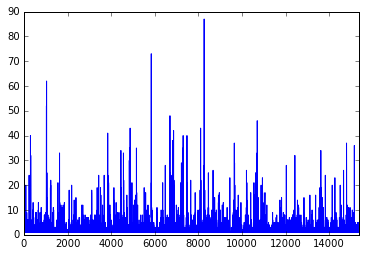

In [116]:
uniqueCollabs.totalCollabs.plot()

### Filter out locations that are far outside campus/downtown durham
from looking at an early visualization of all data, there is one site in particular that is pretty far south and east. Remove any collaboration with a source or destination at this remote site for the purposes of the visualization. 

In [109]:
# most southernly
print collab_df['dst_LAT'].min()

# most easternly
print collab_df['dst_LON'].max()

35.9220293709
-78.8691705465


In [112]:
# Find the Address of this location
remoteAddress = collab_df.loc[collab_df.dst_LAT == collab_df.dst_LAT.min(), 'dst_ADDRESS'].iloc[0]
remoteAddress

'19 TW Alexander Dr'

In [113]:
# Find the BL_ID of this location
remote_BL_ID = collab_df.loc[collab_df.dst_LAT == collab_df.dst_LAT.min(), 'dst_BL_ID'].iloc[0]
remote_BL_ID

8329

In [114]:
# remove this collaboration from the dataset
uniqueCollabs = uniqueCollabs[uniqueCollabs.a1_BL_ID != remote_BL_ID]
uniqueCollabs = uniqueCollabs[uniqueCollabs.a2_BL_ID != remote_BL_ID]

uniqueCollabs.shape

(7272, 12)

### Write the filtered vis data to a file


In [115]:
uniqueCollabs.to_csv('vis/vis_collaborations.tsv', sep='\t', index=False)

# Prep the circos data

### building circos data

In [6]:
unique_bldgs = pd.read_table('data/processed/buildingNames.tsv', sep='\t')

In [12]:
f = open('vis/circos/buildings/buildings_karotype.txt', 'w')
for i, row in unique_bldgs.iterrows():
    this_chr = '\t'.join(['chr', '-', str(row['BL_ID']), row['NAME'], '0', '100', 'lpurple'])
    f.write(this_chr+'\n')
f.close()